In [1]:
!ls

 A2C_closest_strategy.py	     edc_report.csv
 closest_strategy_data.csv	     sdn_strategy_closest.py
'EDA closest strategy-Copy1.ipynb'   sdn_strategy_closest_txt_v1.py
'EDA closest strategy.ipynb'


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
import seaborn as sns

In [34]:
df = pd.read_csv('closest_strategy_data_50cars_300seg.csv', delimiter=";")

In [4]:
df

,ap_id,edc_id_0,edc_location_0,overall_std_u_0,max_std_u_0,pue_0,power_demand_0,power_consumption_0,it_power_0,cooling_power_0,power_generation_0,charging_power_0,energy_stored_0,energy_capacity_0,edc_id_1,edc_location_1,overall_std_u_1,max_std_u_1,pue_1,power_demand_1,power_consumption_1,it_power_1,cooling_power_1,power_generation_1,charging_power_1,energy_stored_1,energy_capacity_1,edc_id_2,edc_location_2,overall_std_u_2,max_std_u_2,pue_2,power_demand_2,power_consumption_2,it_power_2,cooling_power_2,power_generation_2,charging_power_2,energy_stored_2,energy_capacity_2,edc_distance_0,edc_distance_1,edc_distance_2,action
0,ap_0,edc_0,"(950.6207, 777.7721)",0.0,500,0.0,0.000000,-50.000000,0.000000,0,50,0,100.000000,100,edc_1,"(1639.6117, 1482.3435)",0.0,500,0.0,0.000000,-50.000000,0.000000,0,50,0,100.0,100,edc_2,"(802.2772, 2478.5847)",0.0,500,0.0,0.000000,-50.000000,0.000000,0,50,0,100.000000,100,369.133502,1133.652453,1320.622651,edc_1
1,ap_1,edc_0,"(950.6207, 777.7721)",0.0,500,0.0,0.000000,-50.000000,0.000000,0,50,0,100.000000,100,edc_1,"(1639.6117, 1482.3435)",0.0,500,0.0,0.000000,-50.000000,0.000000,0,50,0,100.0,100,edc_2,"(802.2772, 2478.5847)",0.0,500,0.0,0.000000,-50.000000,0.000000,0,50,0,100.000000,100,400.047844,1700.704329,2060.252671,edc_2
2,ap_2,edc_0,"(950.6207, 777.7721)",0.0,500,0.0,0.000000,-50.000000,0.000000,0,50,0,100.000000,100,edc_1,"(1639.6117, 1482.3435)",0.0,500,0.0,0.000000,-50.000000,0.000000,0,50,0,100.0,100,edc_2,"(802.2772, 2478.5847)",0.0,500,0.0,0.000000,-50.000000,0.000000,0,50,0,100.000000,100,613.067125,1184.287126,1329.256048,edc_0
3,ap_3,edc_0,"(950.6207, 777.7721)",0.0,500,0.0,0.000000,-50.000000,0.000000,0,50,0,100.000000,100,edc_1,"(1639.6117, 1482.3435)",0.0,500,0.0,0.000000,-50.000000,0.000000,0,50,0,100.0,100,edc_2,"(802.2772, 2478.5847)",0.0,500,0.0,0.000000,-50.000000,0.000000,0,50,0,100.000000,100,627.531664,1159.676551,1899.352437,edc_2
4,ap_4,edc_0,"(950.6207, 777.7721)",0.0,500,0.0,0.000000,-50.000000,0.000000,0,50,0,100.000000,100,edc_1,"(1639.6117, 1482.3435)",0.0,500,0.0,0.000000,-50.000000,0.000000,0,50,0,100.0,100,edc_2,"(802.2772, 2478.5847)",0.0,500,0.0,0.000000,-50.000000,0.000000,0,50,0,100.000000,100,299.587171,686.840512,1512.449018,edc_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12931,ap_6,edc_0,"(950.6207, 777.7721)",360.0,500,1.0,527.347252,377.347252,527.347252,0,50,-100,91.697222,100,edc_1,"(1639.6117, 1482.3435)",380.0,500,1.0,536.291405,386.291405,536.291405,0,50,-100,91.8,100,edc_2,"(802.2772, 2478.5847)",180.0,500,1.0,497.360474,347.360474,497.360474,0,50,-100,91.697222,100,685.185692,1069.088510,2186.212050,edc_0
12932,ap_7,edc_0,"(950.6207, 777.7721)",360.0,500,1.0,527.347252,377.347252,527.347252,0,50,-100,91.697222,100,edc_1,"(1639.6117, 1482.3435)",380.0,500,1.0,536.291405,386.291405,536.291405,0,50,-100,91.8,100,edc_2,"(802.2772, 2478.5847)",180.0,500,1.0,497.360474,347.360474,497.360474,0,50,-100,91.697222,100,400.383513,1191.755001,1667.910912,edc_1
12933,ap_8,edc_0,"(950.6207, 777.7721)",360.0,500,1.0,527.347252,377.347252,527.347252,0,50,-100,91.697222,100,edc_1,"(1639.6117, 1482.3435)",380.0,500,1.0,536.291405,386.291405,536.291405,0,50,-100,91.8,100,edc_2,"(802.2772, 2478.5847)",180.0,500,1.0,497.360474,347.360474,497.360474,0,50,-100,91.697222,100,423.268899,1407.665266,1984.784647,edc_0
12934,ap_9,edc_0,"(950.6207, 777.7721)",360.0,500,1.0,527.347252,377.347252,527.347252,0,50,-100,91.697222,100,edc_1,"(1639.6117, 1482.3435)",380.0,500,1.0,536.291405,386.291405,536.291405,0,50,-100,91.8,100,edc_2,"(802.2772, 2478.5847)",180.0,500,1.0,497.360474,347.360474,497.360474,0,50,-100,91.697222,100,573.842145,780.349062,1020.882641,edc_1


In [5]:
df.action.value_counts()

edc_0    4704
edc_1    4704
edc_2    3528
Name: action, dtype: int64

In [6]:
df.dtypes

ap_id                   object
edc_id_0                object
edc_location_0          object
overall_std_u_0        float64
max_std_u_0              int64
pue_0                  float64
power_demand_0         float64
power_consumption_0    float64
it_power_0             float64
cooling_power_0          int64
power_generation_0       int64
charging_power_0         int64
energy_stored_0        float64
energy_capacity_0        int64
edc_id_1                object
edc_location_1          object
overall_std_u_1        float64
max_std_u_1              int64
pue_1                  float64
power_demand_1         float64
power_consumption_1    float64
it_power_1             float64
cooling_power_1          int64
power_generation_1       int64
charging_power_1         int64
energy_stored_1        float64
energy_capacity_1        int64
edc_id_2                object
edc_location_2          object
overall_std_u_2        float64
max_std_u_2              int64
pue_2                  float64
power_de

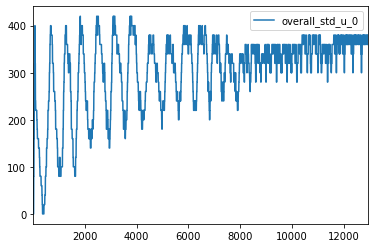

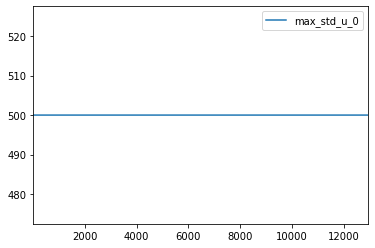

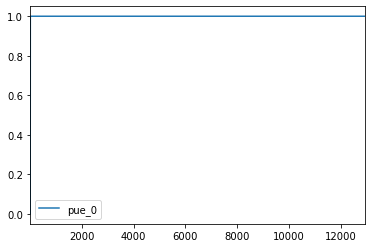

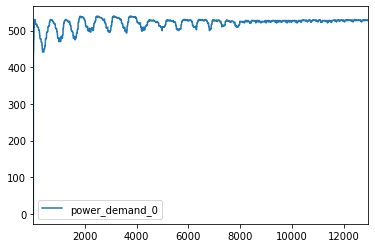

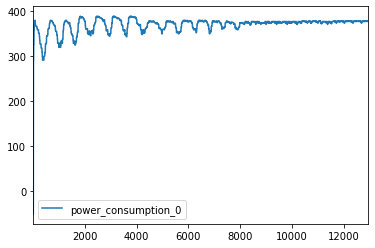

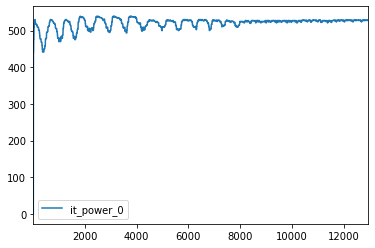

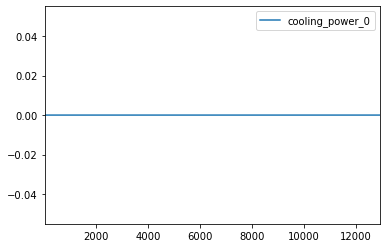

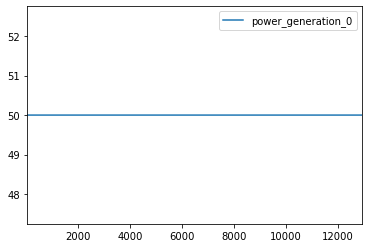

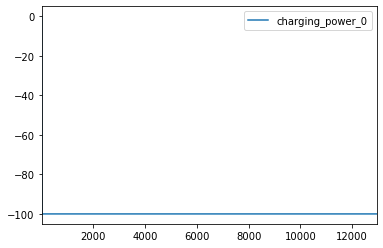

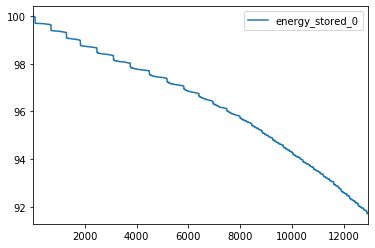

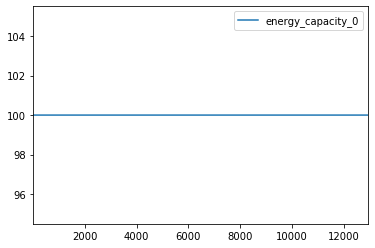

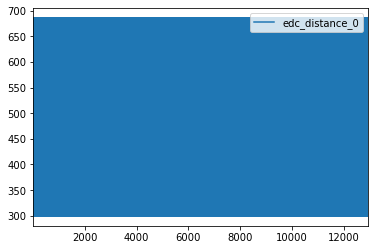

In [7]:
df_0 = df.iloc[10:,] # copy() # [df.ap_id=="ap_0"]
df_0_0 = df_0[[col for col in df_0.columns if "_0" in col]]
for col in df_0_0.select_dtypes(include=np.number).columns:
    df_0_0.plot(y=col)

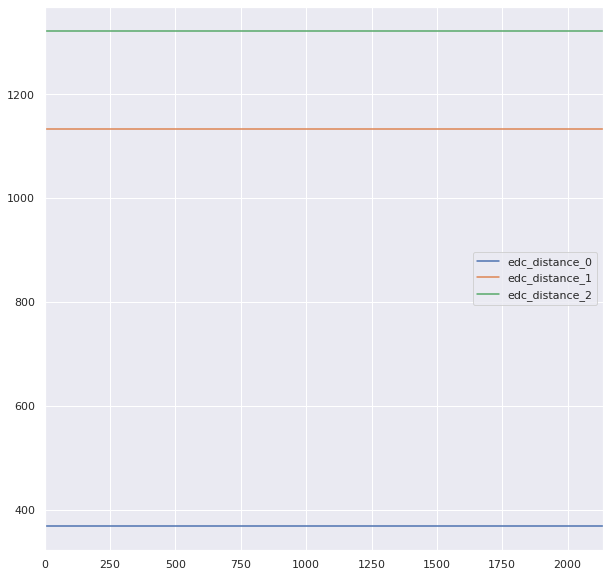

In [21]:
sns.set()
plt.rcParams['figure.figsize']=(10,10)
df_0.plot(y=[col for col in df.columns if "edc_distance" in col])

Important columns:
- overall_std_u_0, overall_std_u_1, overal_std_u_2 -> scale to max_std_u_(0,1,2)
- power_consumption_0, power_consumption_1, power_consumption_2 -> min_max w/o firt timestamp (for now)
- edc_distance_0, edc_distance_1, edc_distance_2 -> min_max w/o first timestamp 
- action -> label encoding

Possible columns
- power_demand_0, power_demand_1, power_demand_2
- it_power_0, it_power_1, it_power_2

In [35]:
df_tmp = df.iloc[11:].reset_index()
final_df = df_tmp[["ap_id",
               "overall_std_u_0", "overall_std_u_1", "overall_std_u_2",
               "max_std_u_0", "max_std_u_1", "max_std_u_2",
               "power_consumption_0", "power_consumption_1", "power_consumption_2",
               "edc_distance_0", "edc_distance_1", "edc_distance_2",
               "action"
               ]]

In [36]:
final_df

,ap_id,overall_std_u_0,overall_std_u_1,overall_std_u_2,max_std_u_0,max_std_u_1,max_std_u_2,power_consumption_0,power_consumption_1,power_consumption_2,edc_distance_0,edc_distance_1,edc_distance_2,action
0,ap_0,0.0,0.0,0.0,500,500,500,291.393776,291.393776,291.393776,369.133502,1133.652453,1320.622651,edc_1
1,ap_1,0.0,0.0,0.0,500,500,500,291.393776,291.393776,291.393776,400.047844,1700.704329,2060.252671,edc_2
2,ap_2,0.0,0.0,0.0,500,500,500,291.393776,291.393776,291.393776,613.067125,1184.287126,1329.256048,edc_0
3,ap_3,0.0,0.0,0.0,500,500,500,291.393776,291.393776,291.393776,627.531664,1159.676551,1899.352437,edc_2
4,ap_4,0.0,0.0,0.0,500,500,500,291.393776,291.393776,291.393776,299.587171,686.840512,1512.449018,edc_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12920,ap_6,360.0,380.0,180.0,500,500,500,377.347252,386.291405,347.360474,685.185692,1069.088510,2186.212050,edc_0
12921,ap_7,360.0,380.0,180.0,500,500,500,377.347252,386.291405,347.360474,400.383513,1191.755001,1667.910912,edc_1
12922,ap_8,360.0,380.0,180.0,500,500,500,377.347252,386.291405,347.360474,423.268899,1407.665266,1984.784647,edc_0
12923,ap_9,360.0,380.0,180.0,500,500,500,377.347252,386.291405,347.360474,573.842145,780.349062,1020.882641,edc_1


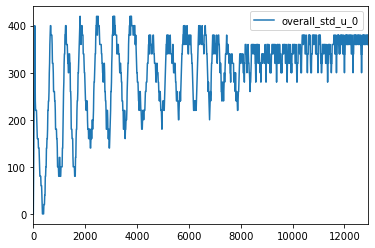

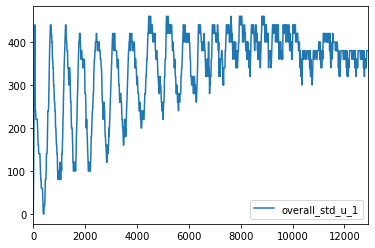

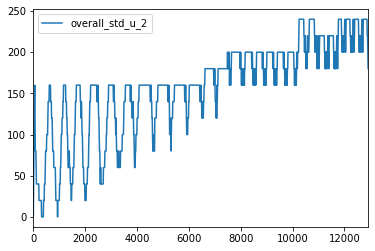

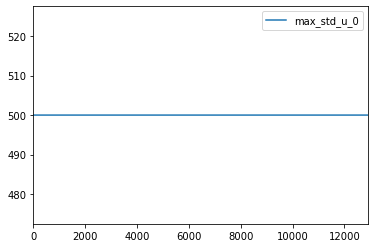

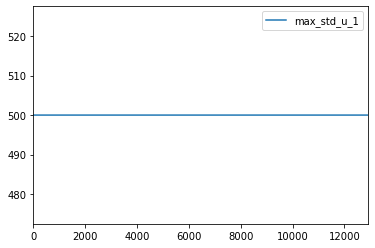

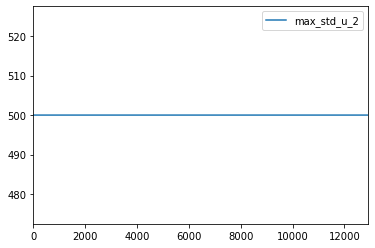

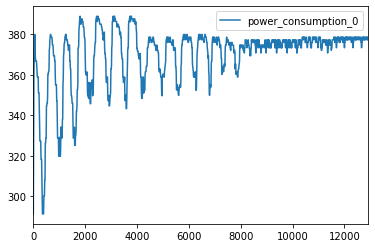

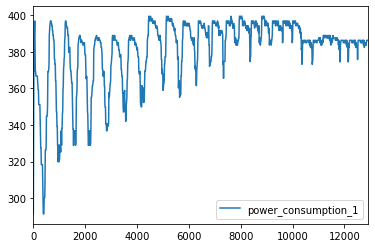

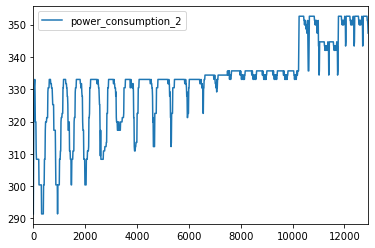

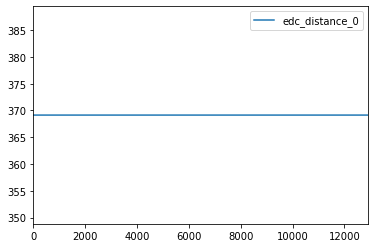

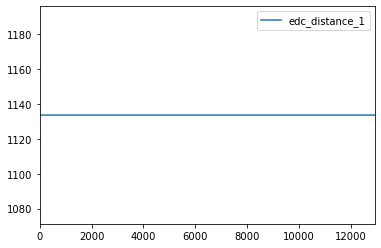

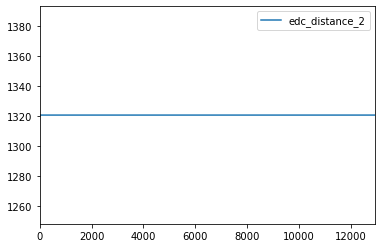

In [37]:
for col in final_df.select_dtypes(include=np.number).columns:
    final_df[final_df.ap_id=="ap_0"].plot(y=col)

In [62]:
def scale(data, min_, max_):
    return (data - min_) / (max_ - min_)

def scale_df(df_):
    df = df_.copy()
    for col in [col for col in final_df.columns if "edc_distance" in col]:
        df[col] = scale(df[col], 299.58, 2186.21)
    for col in [col for col in final_df.columns if "power_consumption" in col]:
        df[col] = scale(df[col], df["max_std_u_0"]/100*58, df["max_std_u_0"]/100*80)
    for col in [col for col in final_df.columns if "overall_std_u" in col]:
        df[col] = scale(df[col], 0, df["max_std_u_0"])
    return df

s_df = scale_df(final_df)
s_df

,ap_id,overall_std_u_0,overall_std_u_1,overall_std_u_2,max_std_u_0,max_std_u_1,max_std_u_2,power_consumption_0,power_consumption_1,power_consumption_2,edc_distance_0,edc_distance_1,edc_distance_2,action
0,ap_0,0.00,0.00,0.00,500,500,500,0.012671,0.012671,0.012671,0.036867,0.442096,0.541199,edc_1
1,ap_1,0.00,0.00,0.00,500,500,500,0.012671,0.012671,0.012671,0.053253,0.742660,0.933237,edc_2
2,ap_2,0.00,0.00,0.00,500,500,500,0.012671,0.012671,0.012671,0.166162,0.468935,0.545775,edc_0
3,ap_3,0.00,0.00,0.00,500,500,500,0.012671,0.012671,0.012671,0.173829,0.455890,0.847952,edc_2
4,ap_4,0.00,0.00,0.00,500,500,500,0.012671,0.012671,0.012671,0.000004,0.205266,0.642876,edc_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12920,ap_6,0.72,0.76,0.36,500,500,500,0.794066,0.875376,0.521459,0.204389,0.407875,1.000001,edc_0
12921,ap_7,0.72,0.76,0.36,500,500,500,0.794066,0.875376,0.521459,0.053430,0.472893,0.725278,edc_1
12922,ap_8,0.72,0.76,0.36,500,500,500,0.794066,0.875376,0.521459,0.065561,0.587336,0.893235,edc_0
12923,ap_9,0.72,0.76,0.36,500,500,500,0.794066,0.875376,0.521459,0.145371,0.254830,0.382323,edc_1


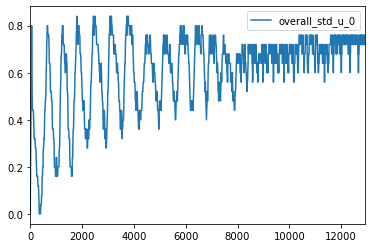

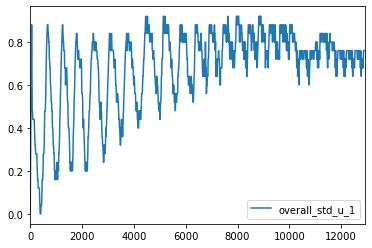

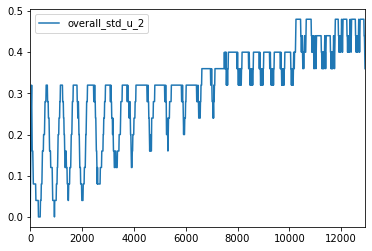

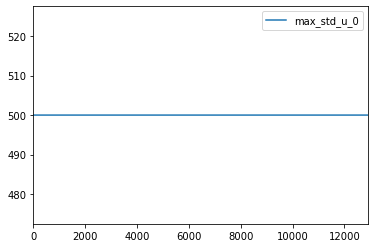

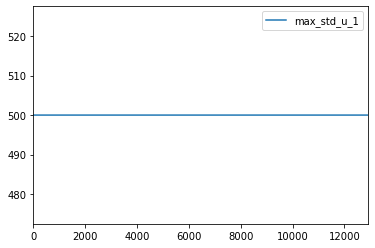

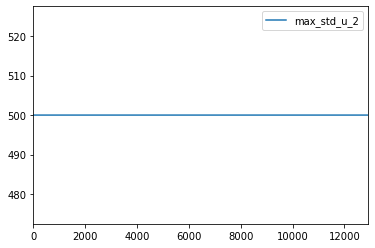

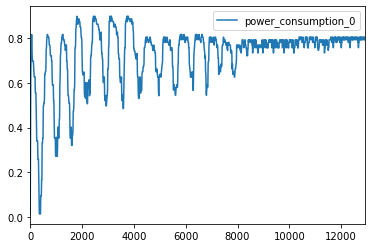

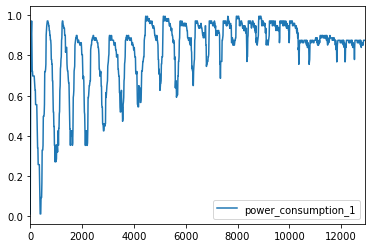

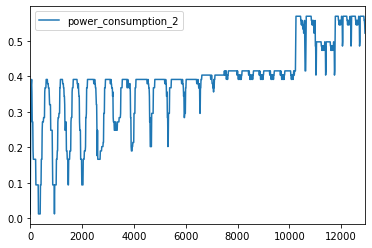

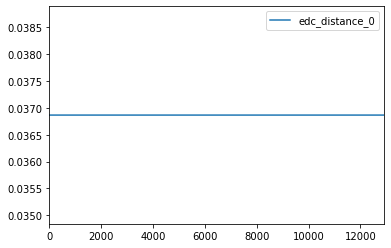

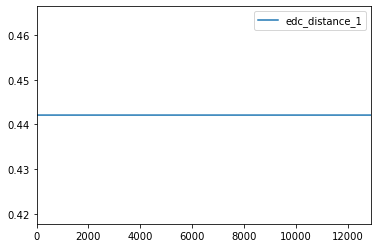

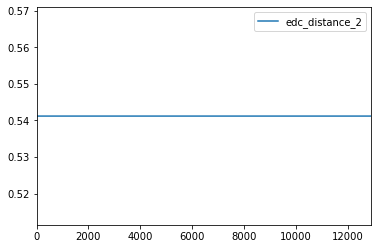

In [63]:
for col in s_df.select_dtypes(include=np.number).columns:
    s_df[final_df.ap_id=="ap_0"].plot(y=col)

In [64]:
data = final_df.values[:,1:]
obs = data[:,:-1]
actions = data[:,-1]

In [65]:
final_df

,ap_id,overall_std_u_0,overall_std_u_1,overall_std_u_2,max_std_u_0,max_std_u_1,max_std_u_2,power_consumption_0,power_consumption_1,power_consumption_2,edc_distance_0,edc_distance_1,edc_distance_2,action
0,ap_0,0.0,0.0,0.0,500,500,500,291.393776,291.393776,291.393776,369.133502,1133.652453,1320.622651,edc_1
1,ap_1,0.0,0.0,0.0,500,500,500,291.393776,291.393776,291.393776,400.047844,1700.704329,2060.252671,edc_2
2,ap_2,0.0,0.0,0.0,500,500,500,291.393776,291.393776,291.393776,613.067125,1184.287126,1329.256048,edc_0
3,ap_3,0.0,0.0,0.0,500,500,500,291.393776,291.393776,291.393776,627.531664,1159.676551,1899.352437,edc_2
4,ap_4,0.0,0.0,0.0,500,500,500,291.393776,291.393776,291.393776,299.587171,686.840512,1512.449018,edc_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12920,ap_6,360.0,380.0,180.0,500,500,500,377.347252,386.291405,347.360474,685.185692,1069.088510,2186.212050,edc_0
12921,ap_7,360.0,380.0,180.0,500,500,500,377.347252,386.291405,347.360474,400.383513,1191.755001,1667.910912,edc_1
12922,ap_8,360.0,380.0,180.0,500,500,500,377.347252,386.291405,347.360474,423.268899,1407.665266,1984.784647,edc_0
12923,ap_9,360.0,380.0,180.0,500,500,500,377.347252,386.291405,347.360474,573.842145,780.349062,1020.882641,edc_1


In [18]:
min([min(final_df[col]) for col in final_df.columns if "edc_distance" in col])

299.5871710270652

In [17]:
max([max(final_df[col]) for col in final_df.columns if "edc_distance" in col])

2186.2120501195

In [51]:
final_df.describe()

,overall_std_u_0,overall_std_u_1,overall_std_u_2,max_std_u_0,max_std_u_1,max_std_u_2,power_consumption_0,power_consumption_1,power_consumption_2,edc_distance_0,edc_distance_1,edc_distance_2
count,12925.000000,12925.000000,12925.000000,12925.0,12925.0,12925.0,12925.000000,12925.000000,12925.000000,12925.000000,12925.000000,12925.000000
mean,305.974468,340.425532,157.855319,500.0,500.0,500.0,370.079112,380.979476,332.518017,498.846111,1125.569956,1640.769215
std,80.647647,93.689325,56.385334,0.0,0.0,0.0,14.790311,18.652908,12.323588,121.138167,289.292819,351.036600
min,0.000000,0.000000,0.000000,500.0,500.0,500.0,291.393776,291.393776,291.393776,299.587171,686.840512,1020.882641
25%,260.000000,300.000000,140.000000,500.0,500.0,500.0,366.783798,377.183922,330.446968,400.047844,780.349062,1329.256048
50%,340.000000,380.000000,160.000000,500.0,500.0,500.0,374.741982,386.291405,333.025635,497.648939,1159.676551,1667.910912
75%,360.000000,400.000000,200.000000,500.0,500.0,500.0,377.347252,394.218513,335.673149,613.067125,1324.614726,1984.784647
max,420.000000,460.000000,240.000000,500.0,500.0,500.0,388.938919,399.444695,352.586655,685.185692,1700.704329,2186.212050


In [66]:
s_df.describe().loc[['min','max'],:]

,overall_std_u_0,overall_std_u_1,overall_std_u_2,max_std_u_0,max_std_u_1,max_std_u_2,power_consumption_0,power_consumption_1,power_consumption_2,edc_distance_0,edc_distance_1,edc_distance_2
min,0.00,0.00,0.00,500.0,500.0,500.0,0.012671,0.012671,0.012671,0.000004,0.205266,0.382323
max,0.84,0.92,0.48,500.0,500.0,500.0,0.899445,0.994952,0.568970,0.204389,0.742660,1.000001


In [58]:
final_df[['edc_distance_0' ,'edc_distance_1', 'edc_distance_2']].head(100)

,edc_distance_0,edc_distance_1,edc_distance_2
0,369.133502,1133.652453,1320.622651
1,400.047844,1700.704329,2060.252671
2,613.067125,1184.287126,1329.256048
3,627.531664,1159.676551,1899.352437
4,299.587171,686.840512,1512.449018
5,597.610726,1324.614726,1342.795436
6,685.185692,1069.088510,2186.212050
7,400.383513,1191.755001,1667.910912
8,423.268899,1407.665266,1984.784647
9,573.842145,780.349062,1020.882641


In [96]:
df = pd.read_csv('closest_strategy_trajectories.csv', delimiter=";")
df["penalty"] = False

In [97]:
import ast
obs = []   
df.obs = df.obs.apply(ast.literal_eval)
df.obs = df.obs.apply(lambda x : obs.append(x))

In [98]:
df

,obs,action,penalty
0,None,edc_1,False
1,None,edc_2,False
2,None,edc_0,False
3,None,edc_2,False
4,None,edc_0,False
...,...,...,...
12931,None,edc_0,False
12932,None,edc_1,False
12933,None,edc_0,False
12934,None,edc_1,False


In [89]:
df.obs[0][0]

0.0

In [99]:
obs = np.array(obs)

In [94]:
for o in obs:
    o = np.array(o)

In [100]:
obs.shape


(12936, 9)

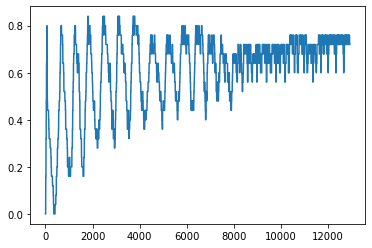

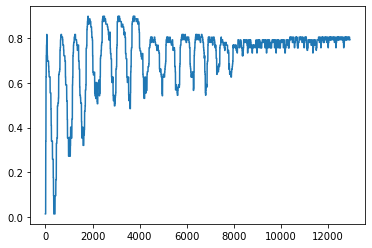

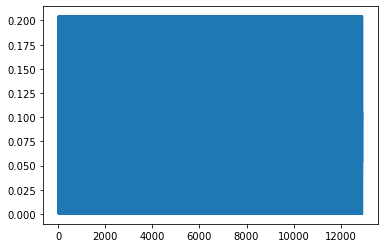

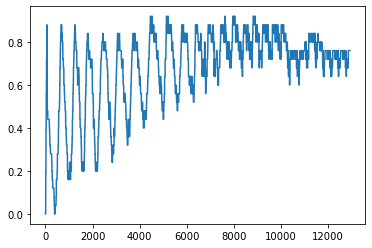

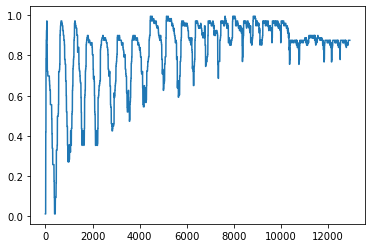

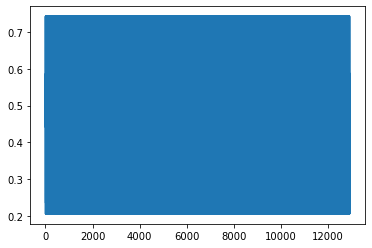

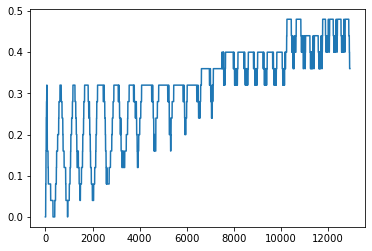

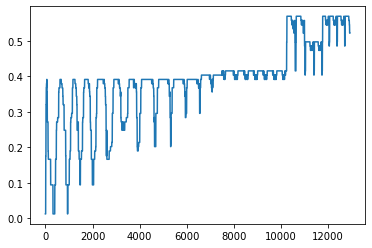

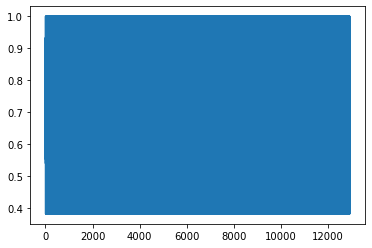

In [108]:
for col in range(obs.shape[1]):
    plt.figure()
    plt.plot(obs[11:,col])
    plt.show

In [110]:
final_df = pd.DataFrame(np.concatenate([obs, df.action.values[:,np.newaxis], df.penalty.values[:,np.newaxis]],axis=1),
                        columns=["util_0","power_0","dist_0",
                                 "util_1","power_1","dist_1",
                                 "util_2","power_2","dist_2",
                                 "action","penalty"])

In [111]:
final_df

,util_0,power_0,dist_0,util_1,power_1,dist_1,util_2,power_2,dist_2,action,penalty
0,0,-3.09091,0.0368665,0,-3.09091,0.442096,0,-3.09091,0.541199,edc_1,False
1,0,-3.09091,0.0532525,0,-3.09091,0.74266,0,-3.09091,0.933237,edc_2,False
2,0,-3.09091,0.166162,0,-3.09091,0.468935,0,-3.09091,0.545775,edc_0,False
3,0,-3.09091,0.173829,0,-3.09091,0.45589,0,-3.09091,0.847952,edc_2,False
4,0,-3.09091,3.80097e-06,0,-3.09091,0.205266,0,-3.09091,0.642876,edc_0,False
...,...,...,...,...,...,...,...,...,...,...,...
12931,0.72,0.794066,0.204389,0.76,0.875376,0.407875,0.36,0.521459,1,edc_0,False
12932,0.72,0.794066,0.0534305,0.76,0.875376,0.472893,0.36,0.521459,0.725278,edc_1,False
12933,0.72,0.794066,0.0655608,0.76,0.875376,0.587336,0.36,0.521459,0.893235,edc_0,False
12934,0.72,0.794066,0.145371,0.76,0.875376,0.25483,0.36,0.521459,0.382323,edc_1,False


In [112]:
final_df.to_csv('closest_strategy_trajectories.csv', index=False)

In [113]:
final_df.dtypes

util_0     object
power_0    object
dist_0     object
util_1     object
power_1    object
dist_1     object
util_2     object
power_2    object
dist_2     object
action     object
penalty    object
dtype: object

In [5]:
!ls ../data

 closest_strategy_data_10cars_60seg.csv   'edc_report(transciever_info).csv'
 closest_strategy_data_50cars_300seg.csv   vanilla_A2C_trajectories.csv
 closest_strategy_trajectories.csv


In [14]:
df = pd.read_csv('../data/closest_strategy_data_50cars_300seg.csv', delimiter=";").iloc[11:].reset_index()
df

,index,ap_id,edc_id_0,edc_location_0,overall_std_u_0,max_std_u_0,pue_0,power_demand_0,power_consumption_0,it_power_0,cooling_power_0,power_generation_0,charging_power_0,energy_stored_0,energy_capacity_0,edc_id_1,edc_location_1,overall_std_u_1,max_std_u_1,pue_1,power_demand_1,power_consumption_1,it_power_1,cooling_power_1,power_generation_1,charging_power_1,energy_stored_1,energy_capacity_1,edc_id_2,edc_location_2,overall_std_u_2,max_std_u_2,pue_2,power_demand_2,power_consumption_2,it_power_2,cooling_power_2,power_generation_2,charging_power_2,energy_stored_2,energy_capacity_2,edc_distance_0,edc_distance_1,edc_distance_2,action
0,11,ap_0,edc_0,"(950.6207, 777.7721)",0.0,500,1.0,441.393776,291.393776,441.393776,0,50,-100,100.000000,100,edc_1,"(1639.6117, 1482.3435)",0.0,500,1.0,441.393776,291.393776,441.393776,0,50,-100,100.0,100,edc_2,"(802.2772, 2478.5847)",0.0,500,1.0,441.393776,291.393776,441.393776,0,50,-100,100.000000,100,369.133502,1133.652453,1320.622651,edc_1
1,12,ap_1,edc_0,"(950.6207, 777.7721)",0.0,500,1.0,441.393776,291.393776,441.393776,0,50,-100,100.000000,100,edc_1,"(1639.6117, 1482.3435)",0.0,500,1.0,441.393776,291.393776,441.393776,0,50,-100,100.0,100,edc_2,"(802.2772, 2478.5847)",0.0,500,1.0,441.393776,291.393776,441.393776,0,50,-100,100.000000,100,400.047844,1700.704329,2060.252671,edc_2
2,13,ap_2,edc_0,"(950.6207, 777.7721)",0.0,500,1.0,441.393776,291.393776,441.393776,0,50,-100,100.000000,100,edc_1,"(1639.6117, 1482.3435)",0.0,500,1.0,441.393776,291.393776,441.393776,0,50,-100,100.0,100,edc_2,"(802.2772, 2478.5847)",0.0,500,1.0,441.393776,291.393776,441.393776,0,50,-100,100.000000,100,613.067125,1184.287126,1329.256048,edc_0
3,14,ap_3,edc_0,"(950.6207, 777.7721)",0.0,500,1.0,441.393776,291.393776,441.393776,0,50,-100,100.000000,100,edc_1,"(1639.6117, 1482.3435)",0.0,500,1.0,441.393776,291.393776,441.393776,0,50,-100,100.0,100,edc_2,"(802.2772, 2478.5847)",0.0,500,1.0,441.393776,291.393776,441.393776,0,50,-100,100.000000,100,627.531664,1159.676551,1899.352437,edc_2
4,15,ap_4,edc_0,"(950.6207, 777.7721)",0.0,500,1.0,441.393776,291.393776,441.393776,0,50,-100,100.000000,100,edc_1,"(1639.6117, 1482.3435)",0.0,500,1.0,441.393776,291.393776,441.393776,0,50,-100,100.0,100,edc_2,"(802.2772, 2478.5847)",0.0,500,1.0,441.393776,291.393776,441.393776,0,50,-100,100.000000,100,299.587171,686.840512,1512.449018,edc_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12920,12931,ap_6,edc_0,"(950.6207, 777.7721)",360.0,500,1.0,527.347252,377.347252,527.347252,0,50,-100,91.697222,100,edc_1,"(1639.6117, 1482.3435)",380.0,500,1.0,536.291405,386.291405,536.291405,0,50,-100,91.8,100,edc_2,"(802.2772, 2478.5847)",180.0,500,1.0,497.360474,347.360474,497.360474,0,50,-100,91.697222,100,685.185692,1069.088510,2186.212050,edc_0
12921,12932,ap_7,edc_0,"(950.6207, 777.7721)",360.0,500,1.0,527.347252,377.347252,527.347252,0,50,-100,91.697222,100,edc_1,"(1639.6117, 1482.3435)",380.0,500,1.0,536.291405,386.291405,536.291405,0,50,-100,91.8,100,edc_2,"(802.2772, 2478.5847)",180.0,500,1.0,497.360474,347.360474,497.360474,0,50,-100,91.697222,100,400.383513,1191.755001,1667.910912,edc_1
12922,12933,ap_8,edc_0,"(950.6207, 777.7721)",360.0,500,1.0,527.347252,377.347252,527.347252,0,50,-100,91.697222,100,edc_1,"(1639.6117, 1482.3435)",380.0,500,1.0,536.291405,386.291405,536.291405,0,50,-100,91.8,100,edc_2,"(802.2772, 2478.5847)",180.0,500,1.0,497.360474,347.360474,497.360474,0,50,-100,91.697222,100,423.268899,1407.665266,1984.784647,edc_0
12923,12934,ap_9,edc_0,"(950.6207, 777.7721)",360.0,500,1.0,527.347252,377.347252,527.347252,0,50,-100,91.697222,100,edc_1,"(1639.6117, 1482.3435)",380.0,500,1.0,536.291405,386.291405,536.291405,0,50,-100,91.8,100,edc_2,"(802.2772, 2478.5847)",180.0,500,1.0,497.360474,347.360474,497.360474,0,50,-100,91.697222,100,573.842145,780.349062,1020.882641,edc_1


In [17]:
total_power = np.concatenate([df["power_consumption_0"],df["power_consumption_1"],df["power_consumption_2"]], axis=0)
print("Power mean: {} std: {}".format(np.mean(total_power), np.std(total_power)))

Power mean: 361.19220148397676 std: 25.892223947598993


In [20]:
def overall_mean_and_std(col):
    total_np = np.concatenate([df[col+"_0"],df[col+"_1"],df[col+"_2"]])
    print(col+" mean: {} std: {}".format(np.mean(total_np), np.std(total_np)))
    
overall_mean_and_std("power_consumption")
overall_mean_and_std("overall_std_u")
overall_mean_and_std("edc_distance")

power_consumption mean: 361.19220148397676 std: 25.892223947598993
overall_std_u mean: 268.0851063829787 std: 111.47340040582922
edc_distance mean: 1088.3950940217555 std: 540.2596548382768


In [8]:
df = pd.read_csv('../data/full_mercury_reports/closest_strategy_data_50cars_300seg.csv', delimiter=";").iloc[11:].reset_index()
df

,index,ap_id,edc_id_0,edc_location_0,overall_std_u_0,max_std_u_0,pue_0,power_demand_0,power_consumption_0,it_power_0,cooling_power_0,power_generation_0,charging_power_0,energy_stored_0,energy_capacity_0,edc_id_1,edc_location_1,overall_std_u_1,max_std_u_1,pue_1,power_demand_1,power_consumption_1,it_power_1,cooling_power_1,power_generation_1,charging_power_1,energy_stored_1,energy_capacity_1,edc_id_2,edc_location_2,overall_std_u_2,max_std_u_2,pue_2,power_demand_2,power_consumption_2,it_power_2,cooling_power_2,power_generation_2,charging_power_2,energy_stored_2,energy_capacity_2,edc_distance_0,edc_distance_1,edc_distance_2,action
0,11,ap_0,edc_0,"(950.6207, 777.7721)",0.0,500,1.0,441.393776,291.393776,441.393776,0,50,-100,100.000000,100,edc_1,"(1639.6117, 1482.3435)",0.0,500,1.0,441.393776,291.393776,441.393776,0,50,-100,100.0,100,edc_2,"(802.2772, 2478.5847)",0.0,500,1.0,441.393776,291.393776,441.393776,0,50,-100,100.000000,100,369.133502,1133.652453,1320.622651,edc_1
1,12,ap_1,edc_0,"(950.6207, 777.7721)",0.0,500,1.0,441.393776,291.393776,441.393776,0,50,-100,100.000000,100,edc_1,"(1639.6117, 1482.3435)",0.0,500,1.0,441.393776,291.393776,441.393776,0,50,-100,100.0,100,edc_2,"(802.2772, 2478.5847)",0.0,500,1.0,441.393776,291.393776,441.393776,0,50,-100,100.000000,100,400.047844,1700.704329,2060.252671,edc_2
2,13,ap_2,edc_0,"(950.6207, 777.7721)",0.0,500,1.0,441.393776,291.393776,441.393776,0,50,-100,100.000000,100,edc_1,"(1639.6117, 1482.3435)",0.0,500,1.0,441.393776,291.393776,441.393776,0,50,-100,100.0,100,edc_2,"(802.2772, 2478.5847)",0.0,500,1.0,441.393776,291.393776,441.393776,0,50,-100,100.000000,100,613.067125,1184.287126,1329.256048,edc_0
3,14,ap_3,edc_0,"(950.6207, 777.7721)",0.0,500,1.0,441.393776,291.393776,441.393776,0,50,-100,100.000000,100,edc_1,"(1639.6117, 1482.3435)",0.0,500,1.0,441.393776,291.393776,441.393776,0,50,-100,100.0,100,edc_2,"(802.2772, 2478.5847)",0.0,500,1.0,441.393776,291.393776,441.393776,0,50,-100,100.000000,100,627.531664,1159.676551,1899.352437,edc_2
4,15,ap_4,edc_0,"(950.6207, 777.7721)",0.0,500,1.0,441.393776,291.393776,441.393776,0,50,-100,100.000000,100,edc_1,"(1639.6117, 1482.3435)",0.0,500,1.0,441.393776,291.393776,441.393776,0,50,-100,100.0,100,edc_2,"(802.2772, 2478.5847)",0.0,500,1.0,441.393776,291.393776,441.393776,0,50,-100,100.000000,100,299.587171,686.840512,1512.449018,edc_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12920,12931,ap_6,edc_0,"(950.6207, 777.7721)",360.0,500,1.0,527.347252,377.347252,527.347252,0,50,-100,91.697222,100,edc_1,"(1639.6117, 1482.3435)",380.0,500,1.0,536.291405,386.291405,536.291405,0,50,-100,91.8,100,edc_2,"(802.2772, 2478.5847)",180.0,500,1.0,497.360474,347.360474,497.360474,0,50,-100,91.697222,100,685.185692,1069.088510,2186.212050,edc_0
12921,12932,ap_7,edc_0,"(950.6207, 777.7721)",360.0,500,1.0,527.347252,377.347252,527.347252,0,50,-100,91.697222,100,edc_1,"(1639.6117, 1482.3435)",380.0,500,1.0,536.291405,386.291405,536.291405,0,50,-100,91.8,100,edc_2,"(802.2772, 2478.5847)",180.0,500,1.0,497.360474,347.360474,497.360474,0,50,-100,91.697222,100,400.383513,1191.755001,1667.910912,edc_1
12922,12933,ap_8,edc_0,"(950.6207, 777.7721)",360.0,500,1.0,527.347252,377.347252,527.347252,0,50,-100,91.697222,100,edc_1,"(1639.6117, 1482.3435)",380.0,500,1.0,536.291405,386.291405,536.291405,0,50,-100,91.8,100,edc_2,"(802.2772, 2478.5847)",180.0,500,1.0,497.360474,347.360474,497.360474,0,50,-100,91.697222,100,423.268899,1407.665266,1984.784647,edc_0
12923,12934,ap_9,edc_0,"(950.6207, 777.7721)",360.0,500,1.0,527.347252,377.347252,527.347252,0,50,-100,91.697222,100,edc_1,"(1639.6117, 1482.3435)",380.0,500,1.0,536.291405,386.291405,536.291405,0,50,-100,91.8,100,edc_2,"(802.2772, 2478.5847)",180.0,500,1.0,497.360474,347.360474,497.360474,0,50,-100,91.697222,100,573.842145,780.349062,1020.882641,edc_1


In [5]:
!ls ../data/v

 closest_strategy_data_10cars_60seg.csv   'edc_report(transciever_info).csv'
 closest_strategy_data_50cars_300seg.csv


In [13]:
v.describe()

,index,overall_std_u_0,max_std_u_0,pue_0,power_demand_0,power_consumption_0,it_power_0,cooling_power_0,power_generation_0,charging_power_0,energy_stored_0,energy_capacity_0,overall_std_u_1,max_std_u_1,pue_1,power_demand_1,power_consumption_1,it_power_1,cooling_power_1,power_generation_1,charging_power_1,energy_stored_1,energy_capacity_1,overall_std_u_2,max_std_u_2,pue_2,power_demand_2,power_consumption_2,it_power_2,cooling_power_2,power_generation_2,charging_power_2,energy_stored_2,energy_capacity_2,edc_distance_0,edc_distance_1,edc_distance_2
count,12925.000000,12925.000000,12925.0,12925.0,12925.000000,12925.000000,12925.000000,12925.0,12925.0,12925.0,12925.000000,12925.0,12925.000000,12925.0,12925.0,12925.000000,12925.000000,12925.000000,12925.0,12925.0,12925.0,12925.000000,12925.0,12925.000000,12925.0,12925.0,12925.000000,12925.000000,12925.000000,12925.0,12925.0,12925.0,12925.000000,12925.0,12925.000000,12925.000000,12925.000000
mean,6473.000000,305.974468,500.0,1.0,520.079112,370.079112,520.079112,0.0,50.0,-100.0,96.311798,100.0,340.425532,500.0,1.0,530.979476,380.979476,530.979476,0.0,50.0,-100.0,96.313137,100.0,157.855319,500.0,1.0,482.518017,332.518017,482.518017,0.0,50.0,-100.0,96.333165,100.0,498.846111,1125.569956,1640.769215
std,3731.270449,80.647647,0.0,0.0,14.790311,14.790311,14.790311,0.0,0.0,0.0,2.254445,0.0,93.689325,0.0,0.0,18.652908,18.652908,18.652908,0.0,0.0,0.0,2.251643,0.0,56.385334,0.0,0.0,12.323588,12.323588,12.323588,0.0,0.0,0.0,2.244942,0.0,121.138167,289.292819,351.036600
min,11.000000,0.000000,500.0,1.0,441.393776,291.393776,441.393776,0.0,50.0,-100.0,91.697222,100.0,0.000000,500.0,1.0,441.393776,291.393776,441.393776,0.0,50.0,-100.0,91.800000,100.0,0.000000,500.0,1.0,441.393776,291.393776,441.393776,0.0,50.0,-100.0,91.697222,100.0,299.587171,686.840512,1020.882641
25%,3242.000000,260.000000,500.0,1.0,516.783798,366.783798,516.783798,0.0,50.0,-100.0,94.480556,100.0,300.000000,500.0,1.0,527.183922,377.183922,527.183922,0.0,50.0,-100.0,94.466667,100.0,140.000000,500.0,1.0,480.446968,330.446968,480.446968,0.0,50.0,-100.0,94.475000,100.0,400.047844,780.349062,1329.256048
50%,6473.000000,340.000000,500.0,1.0,524.741982,374.741982,524.741982,0.0,50.0,-100.0,96.600000,100.0,380.000000,500.0,1.0,536.291405,386.291405,536.291405,0.0,50.0,-100.0,96.597017,100.0,160.000000,500.0,1.0,483.025635,333.025635,483.025635,0.0,50.0,-100.0,96.613889,100.0,497.648939,1159.676551,1667.910912
75%,9704.000000,360.000000,500.0,1.0,527.347252,377.347252,527.347252,0.0,50.0,-100.0,98.111111,100.0,400.000000,500.0,1.0,544.218513,394.218513,544.218513,0.0,50.0,-100.0,98.111111,100.0,200.000000,500.0,1.0,485.673149,335.673149,485.673149,0.0,50.0,-100.0,98.113889,100.0,613.067125,1324.614726,1984.784647
max,12935.000000,420.000000,500.0,1.0,538.938919,388.938919,538.938919,0.0,50.0,-100.0,100.000000,100.0,460.000000,500.0,1.0,549.444695,399.444695,549.444695,0.0,50.0,-100.0,100.000000,100.0,240.000000,500.0,1.0,502.586655,352.586655,502.586655,0.0,50.0,-100.0,100.000000,100.0,685.185692,1700.704329,2186.212050


In [16]:
plt.figure()
df.plot(y=[["edc_distance_0", "edc_distance_1", "edc_distance_2"]])
plt.show

KeyError: "None of [Index([('edc_distance_0', 'edc_distance_1', 'edc_distance_2')], dtype='object')] are in the [columns]"

<Figure size 432x288 with 0 Axes>

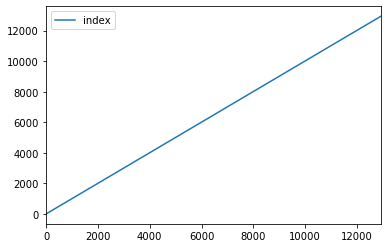

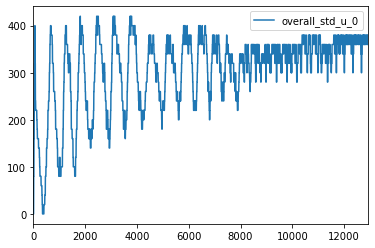

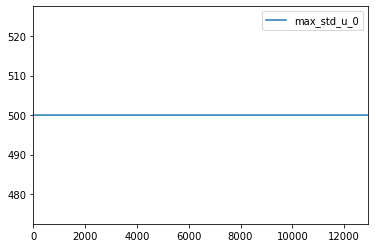

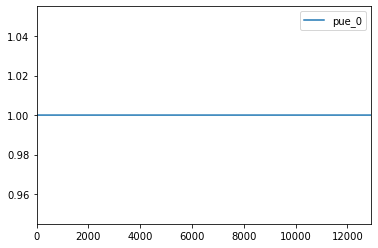

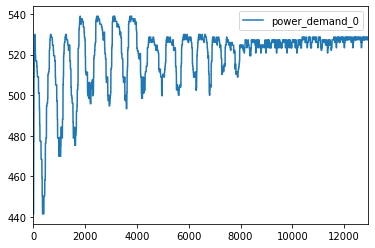

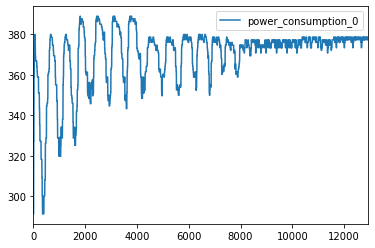

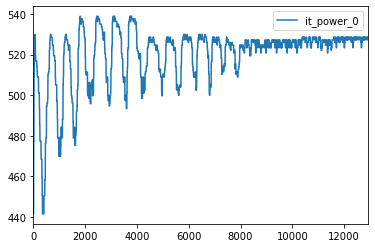

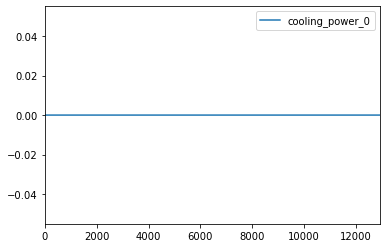

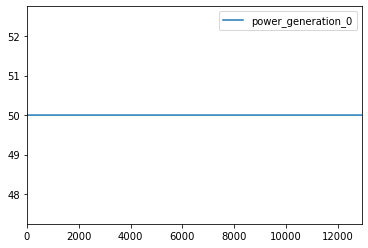

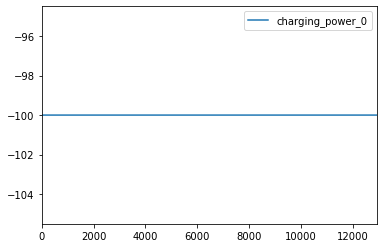

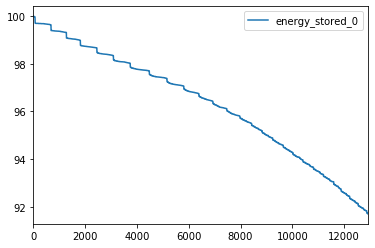

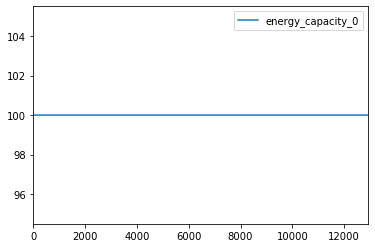

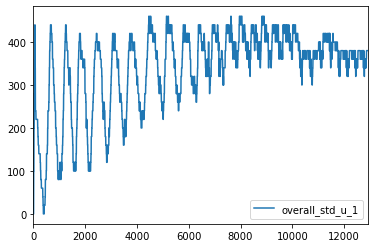

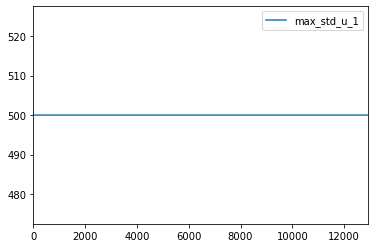

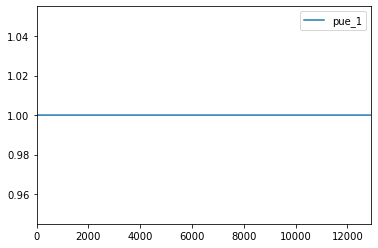

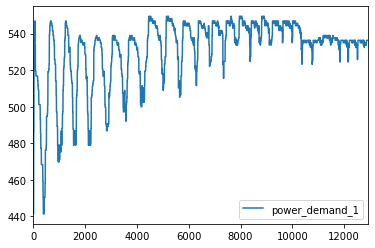

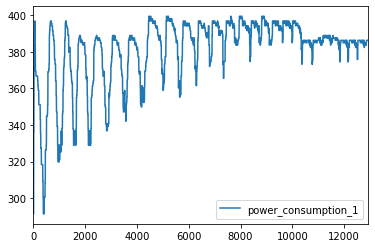

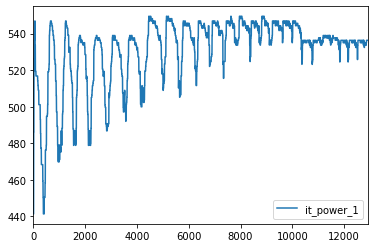

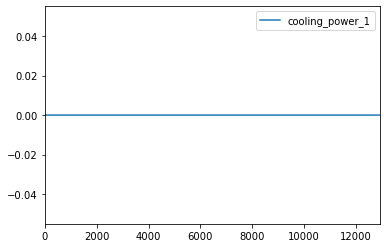

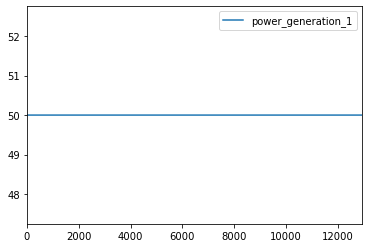

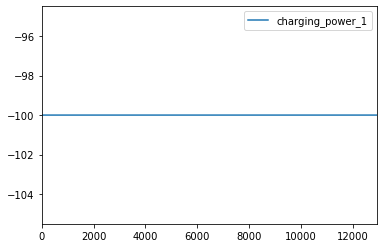

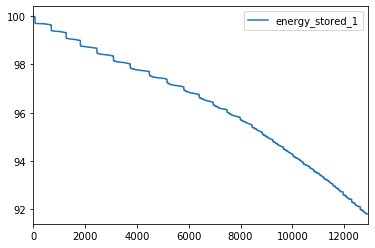

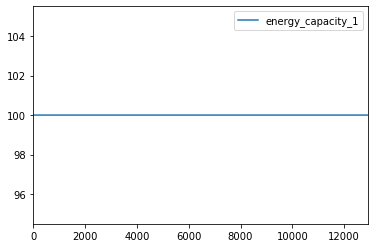

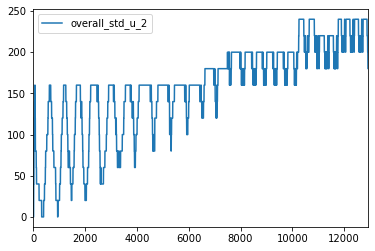

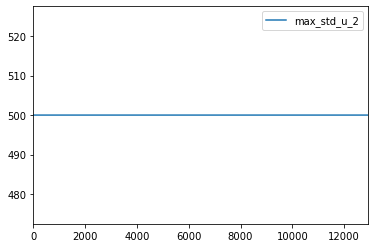

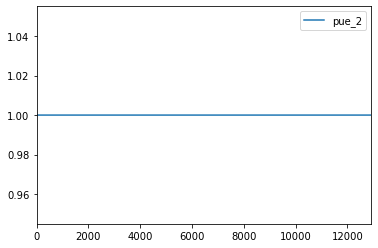

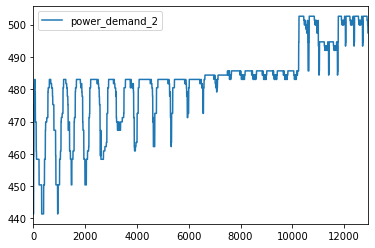

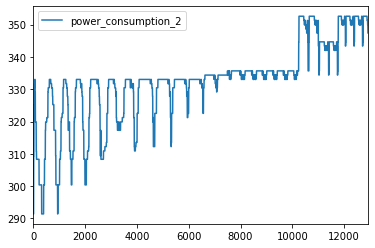

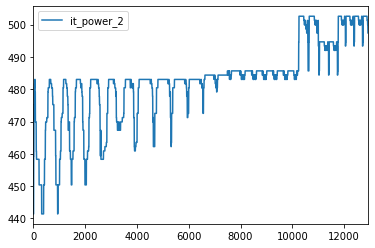

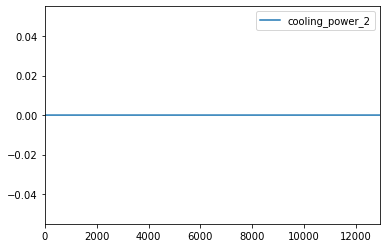

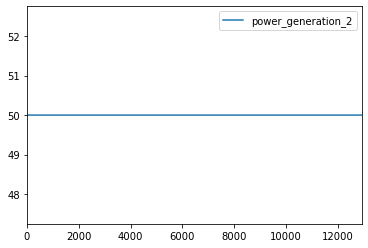

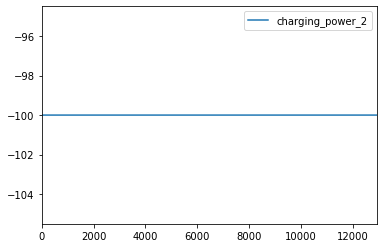

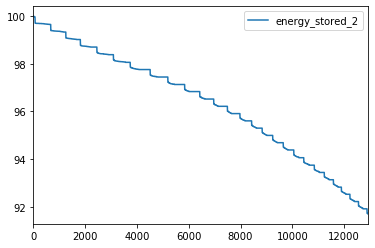

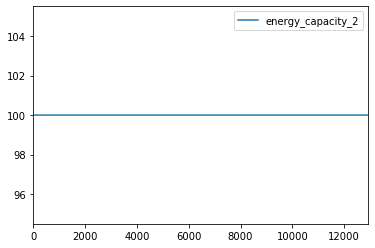

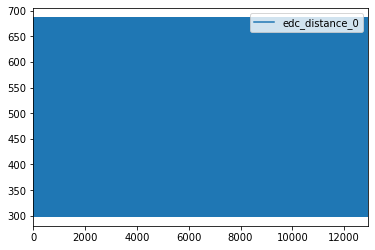

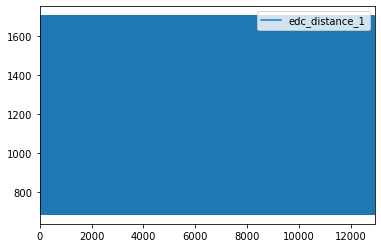

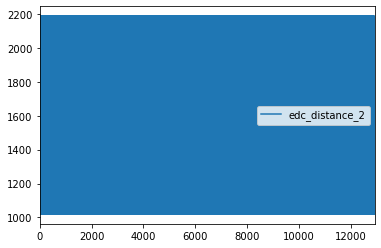

In [20]:
for col in df.select_dtypes(include=np.number).columns:
    df.plot(y=col)